<a href="https://colab.research.google.com/github/dominikaandrzejewska/natural_language_processing/blob/master/NLP_challenge_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pyLDAvis
#!pip install gensim

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 49.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=54bb9e8da80523415b3e08a57b3d70c9bc6bcf9528c453eb931acaae9a599775
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=f34758ceb0e13ccbc0d94a17effa1b3d8938f401a88a52eef09bc0ea7c479dd0
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
from gensim.models import Word2Vec

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

## Dane

In [0]:
sentences = []

for i in range(100000):
  start = np.random.randint(0,20)
  finish = start+np.random.randint(1,10)
  sentence = [str(x) for x in range(start, finish)]
  sentences.append(sentence)


## Model Word2Vec

In [0]:
model = Word2Vec(sentences, size=10, window=5, min_count=1)

In [0]:
model.wv['3']

array([-1.5192286 ,  0.48288485, -0.9408993 , -0.6575976 , -0.67172414,
        0.01223102,  2.5923524 , -4.115778  , -1.4246169 ,  0.02328292],
      dtype=float32)

In [0]:
def plot_heatmap(model):
  plt.figure(figsize=(15,8))
  sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5);

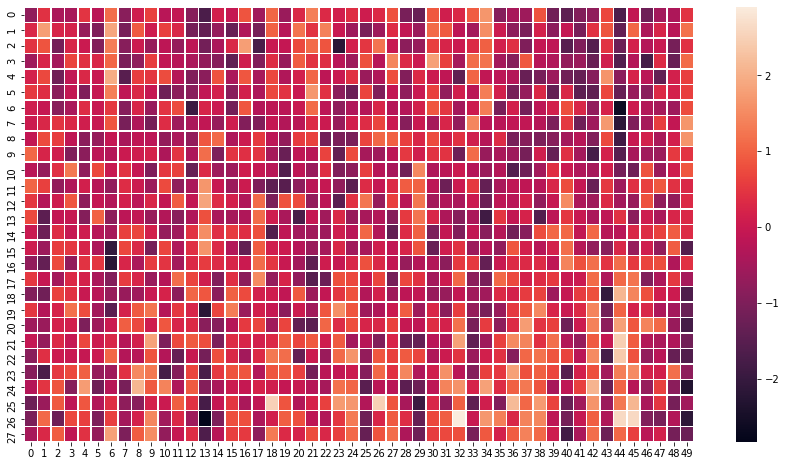

In [0]:
plot_heatmap(Word2Vec(sentences, size=50, window=5, min_count=10))

## PCA

In [0]:
def plot_pca(model):

  X = model.wv[model.wv.vocab]
  pca_model = PCA(n_components=2)
  result = pca_model.fit_transform(X)

  plt.figure(figsize=(10,8))
  plt.scatter(result[:,0],result[:,1]);

  words = list(model.wv.vocab)
  for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))

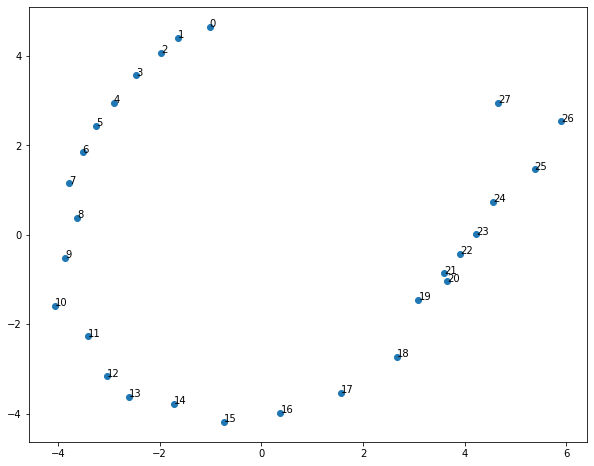

In [0]:
plot_pca(Word2Vec(sentences, size=50, window=10))

## Podobne słowa

In [0]:
model = Word2Vec(sentences, size=300, window=5)
model.most_similar(positive=['10','8'], negative=['6'], topn=3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('12', 0.330951452255249),
 ('13', 0.3148173987865448),
 ('14', 0.2944333553314209)]